GOPAL RAI (ROLL NO- 21103040)

1. An inflow hydrograph is as given in the table below

It passes through a reservoir which is initially filled up to the spillway crest. The storage for a height 
h m above the crest is given as
2
h h +
million m3
, and the outflow as 1.5 100h
m3
/s. Route the flood 
using a time step of 4 hours using the modified Pul’s method.


In [25]:
#1.
import numpy as np
import pandas as pd
Time=[0,4,8,12,16,20,24,28,32,36,40,44]
Inflow=[10,28,68,68,47.6,36.4,29.2,22.8,18,13.6,10.8,10]
df=pd.DataFrame()
df['Time(Hr)']=Time
df['Inflow(m3/s)']=Inflow
df

,Time(Hr),Inflow(m3/s)
0,0,10.0
1,4,28.0
2,8,68.0
3,12,68.0
4,16,47.6
5,20,36.4
6,24,29.2
7,28,22.8
8,32,18.0
9,36,13.6


In [26]:
data=pd.DataFrame()
data['Elevation(m)']=np.arange(0,2.4,0.1)
data['storage']=(data['Elevation(m)'] + (data['Elevation(m)'])**2)*1000000
data['discharge']=100*(data['Elevation(m)'])**1.5
data['Q+2S/dt']=data['discharge']+2*(data['storage'])/(4*60*60)


In [27]:
Q1 = np.array(data['discharge'])
Q_S = np.array(data['Q+2S/dt'])

from scipy import interpolate
interpolate_Q = interpolate.interp1d(Q_S,Q1)  #used to interpolate a 1-D function.

In [28]:
I=[10] #initial inflow
S=[0]  
Q=[0]  #initial dischrge
S1=[0]
for i in range(1,12):
  inf=df['Inflow(m3/s)'][i]+df['Inflow(m3/s)'][i-1]
  I.append(inf)
  s=I[i]+S1[i-1]
  S.append(s)
  q=interpolate_Q(S[i]) #getting the discharge using interpolation on the basis of 2Sn/dt+Q
  Q.append(q)
  s1=S[i]-2*q
  S1.append(s1)
df['I1+I2']=I
df['2S/dt+Q']=S
df['Q']=Q
df['2S/dt-Q']=S1
df


,Time(Hr),Inflow(m3/s),I1+I2,2S/dt+Q,Q,2S/dt-Q
0,0,10.0,10.0,0.000000,0,0.000000
1,4,28.0,38.0,38.000000,7.906703488667293,22.186593
2,8,68.0,96.0,118.186593,29.467924277223183,59.250744
3,12,68.0,136.0,195.250744,50.71551701572584,93.819710
4,16,47.6,115.6,209.419710,54.60581084578073,100.208089
5,20,36.4,84.0,184.208089,47.68359672443448,88.840895
6,24,29.2,65.6,154.440895,39.473402080121936,75.494091
7,28,22.8,52.0,127.494091,32.0362880927894,63.421515
8,32,18.0,40.8,104.221515,25.61432143304692,52.992872
9,36,13.6,31.6,84.592872,20.2522453483009,44.088381


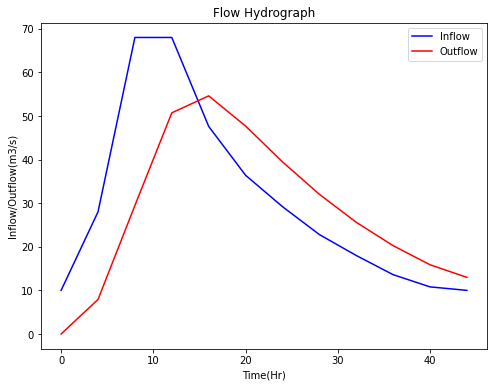

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(df['Time(Hr)'],df['Inflow(m3/s)'],'b',label='Inflow')
plt.plot(df['Time(Hr)'],df['Q'],'r',label='Outflow')
plt.title('Flow Hydrograph')
plt.xlabel('Time(Hr)')
plt.ylabel('Inflow/Outflow(m3/s)')
plt.legend()
plt.show()

2. If the same flood passes through a channel with K=8 hours and x=0.2, route it using the Muskingum 
method with a time step of 4 hours

In [30]:
#2.
#given data
Time=[0,4,8,12,16,20,24,28,32,36,40,44]
Inflow=[10,28,68,68,47.6,36.4,29.2,22.8,18,13.6,10.8,10]
def muskingum():
  k = 8
  x = 0.2
  dt = 4 #change in time in hr
  c_0 = (0.5*dt-k*x)/(k-k*x+0.5*dt)
  c_1 = (0.5*dt+k*x)/(k-k*x+0.5*dt)
  c_2 = (k-k*x-0.5*dt)/(k-k*x+0.5*dt)
  df1=pd.DataFrame()
  df1['Time(Hr)']=Time
  df1['Inflow(m3/s)']=Inflow
  Q1=[0]
  for i in range(1,12):   #using for loop calculating the discharge for different inflow from the data
    Q_m=(c_0*df1['Inflow(m3/s)'][i])+(c_1*df1['Inflow(m3/s)'][i-1])+(c_2*Q1[i-1])
    Q1.append(Q_m)       
  df1['Outflow(m3/s)']=Q1
  return df1
muskingum()

,Time(Hr),Inflow(m3/s),Outflow(m3/s)
0,0,10.0,0.000000
1,4,28.0,5.619048
2,8,68.0,18.181406
3,12,68.0,41.904546
4,16,47.6,53.359524
5,20,36.4,50.083560
6,24,29.2,43.224722
7,28,22.8,36.241521
8,32,18.0,29.612225
9,36,13.6,23.873070


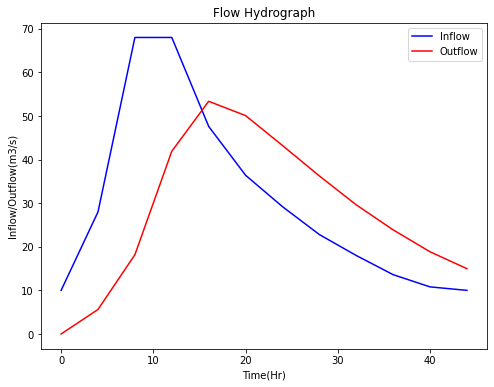

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(Time,Inflow,'b',label='Inflow')
plt.plot(Time,muskingum()['Outflow(m3/s)'],'r',label='Outflow')
plt.title('Flow Hydrograph')
plt.xlabel('Time(Hr)')
plt.ylabel('Inflow/Outflow(m3/s)')
plt.legend()
plt.show()